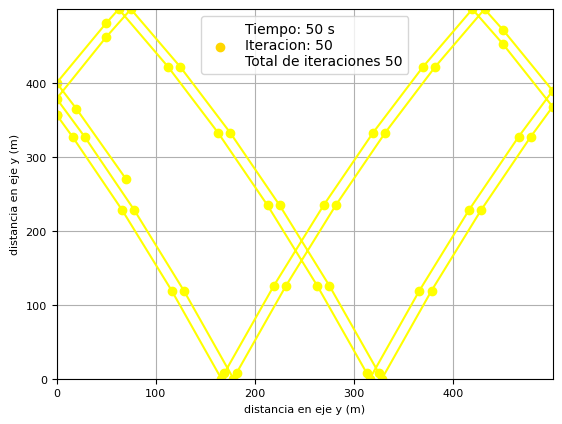

In [77]:
import numpy as np
import sympy as sim
import matplotlib.pyplot as plt
import math
%matplotlib inline 
#se indica que se va a animar
from IPython.display import clear_output


#posiciones iniciales
x0=70
y0=270

#otros parametros inciales 
t0=0
velx0=-50
vely0=100
ax=0
ay=-10

#listas vacias
x=[float(x0)]
y=[float(y0)]
t=[float(t0)]
velx=[float(velx0)]
vely=[float(vely0)]

#tiempos de colision 
tcx=0
tcy=0

#caja de tamaño definido
sx=500
sy=500

xu=x0
yu=y0
velxu=velx0
velyu=vely0
count=0
resultados=[]

#se va a calcular una nueva posicion cada cierto tiempo
#cuantos segundos se quiere que pasen para calcular la nueva posicion 
ti=1
iteracionestot=50

#for ti in np.linspace(0,20,100):
while count<iteracionestot:
         
    xi=xu+velxu*ti + 0.5*ax*ti**2
    velxi=ax*ti + velxu
    yi=yu+velyu*ti + 0.5*ay*ti**2
    velyi=ay*ti + velyu
    #print("ay:",ay)
    #print("vely:", vely)
    #print("yantes : ",y)
    tu=(max(t)+ti)
    

#que pasa si se sale de la caja   
#para delimitar un tiempo de colision 
  
    if xi>=sx: 
        #tomando en cuenta el tiempo de colision desde el ultimo punto 
        coeff= [0.5*ax, velxu, (xu-sx)]
        resul= np.roots(coeff)
        #tcx=resul[0]
        tcx=min([i for i in resul if i >= 0]) #arreglar a la solucion correcta
        resultados.append(resul)
        
                
    elif xi<=0:
        coeff= [0.5*ax, velxu, xu]
        resul= np.roots(coeff)
        #tcx=resul[0]
        tcx=min([i for i in resul if i >= 0]) #arreglar a la solucion correcta
        resultados.append(resul)
        
        
    if yi>=sy: 
        coeff= [0.5*ay, velyu, (yu-sy)]
        resul= np.roots(coeff)
        #tcy=max(resul)
        tcy=min([i for i in resul if i >= 0]) #arreglar a la solucion correcta #aqqququiuquenfcajsnerjn cawckjdneajfnwj como elegir bien el valor de la cuadratica
        resultados.append(resul)
        
        
    elif yi<=0:
        coeff= [0.5*ay, velyu, yu]
        resul= np.roots(coeff)
        #tcy=max(resul)
        tcy=min([i for i in resul if i >= 0]) #arreglar a la solucion correcta
        resultados.append(resul)
        
        
        
#ya con tiempos de colision, se determinan las nuevas posiciones y velocidades

    if tcx!=0 and tcy!=0:
        if tcx>tcy: #tcy es mas pequeño por lo que choco primero en vertical 
            tct=tcy
            xi = xu + velxu*tct + 0.5*ax*tct**2
            velxi = (ax*tct + velxu)  
            yi= yu + velyu*tct + 0.5*ay*tct**2
            velyi = -1*(ay*tct + velyu)
            tu=(max(t)+tct)
            

        elif tcx<tcy:
            tct=tcx
            xi = xu + velxu*tct + 0.5*ax*tct**2
            velxi = -1*(ax*tct + velxu) 
            yi= yu + velyu*tct + 0.5*ay*tct**2
            velyi = (ay*tct + velyu)
            tu=(max(t)+tct)
            

        
    if tcx==0 and tcy!=0:
        tct=tcy
        xi = xu + velxu*tct + 0.5*ax*tct**2
        velxi = (ax*tct + velxu)  
        yi= yu + velyu*tct + 0.5*ay*tct**2
        velyi = -1*(ay*tct + velyu)
        tu=(max(t)+tct)
        
        
    if tcx!=0 and tcy==0:
        tct=tcx
        xi = xu + velxu*tct + 0.5*ax*tct**2
        velxi = -1*(ax*tct + velxu) 
        yi= yu + velyu*tct + 0.5*ay*tct**2
        velyi = (ay*tct + velyu)
        tu=(max(t)+tct)
        
        
    
    tcx=0
    tcy=0
    t.append(tu)
    
    x.append(xi)    
    velx.append(velxi) 
    y.append(yi)
    vely.append(velyi) 
    xu=xi
    yu=yi
    velxu=velxi
    velyu=velyi
    
    count=count+1
    
    #graficar las posiciones 
    plt.scatter(xi,yi,c="gold")
    plt.scatter(x,y, c="yellow")
    plt.plot(x,y,c="yellow")
    plt.xlim(0,sx)
    plt.ylim(0,sy)
    plt.legend(['Tiempo: ' + str(math.floor(count*ti)) + ' s' + '\nIteracion: '+ str(count) + "\nTotal de iteraciones " + str(iteracionestot)])
    #cuantos marcas en el eje queremos desde 0 a xn con uan cada 5 unidades
    plt.yticks(range(0, sy, 100),fontsize=8) 
    plt.xticks(range(0, sx, 100),fontsize=8) 
    plt.ylabel("distancia en eje y (m)", fontsize=8)
    plt.xlabel("distancia en eje y (m)", fontsize=8)
    plt.grid()
    plt.show()
    clear_output(wait=True)
    
    
#print("x:", x)
#print("y: ",y)
#print("t: ", t)
#print("velx: ", velx)

In [63]:
print(max(t))

2.4


In [69]:
#print(y,"\n")
print(x, "\n")
print(t)
#print(vely)
print(velx)


[70.0, 20.0, 0.0, 50.0] 

[0.0, 1.0, 1.4, 2.4]
[-50.0, -50, 50.0, 50.0]


In [65]:
print(resultados)
print(resul)
print(coeff)

[array([0.4])]
[0.4]
[0.0, -50, 20.0]


In [73]:
print(len(t))
print(len(velx))
print(len(x))

101
101
101


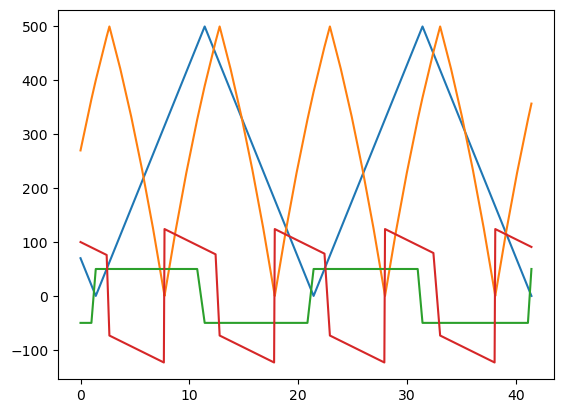

In [81]:
plt.plot(t,x)
plt.plot(t,y)
plt.plot(t,velx)
plt.plot(t,vely)